In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing sklearn libraries
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
"""
0 - squash
1 - basketball
2 - Volleyball
3 - Walk
4 - Gym
"""

df = pd.read_csv('data.csv')
mapper = {'Squash': 0, 'Basketball':1, 'Volleyball':2, 'Walk':3, 'Gym':4}
df['Workout'] = df['Workout'].map(mapper)
df.head()

,Workout,Duration,Burned(kcal),warmup,fat_burn,endurance,anaerobic,threshold,max_heartrate,avg_heartrate
0,0,79,754,12,21,33,13,0,178,144
1,1,62,653,4,19,31,8,0,165,139
2,1,59,648,3,17,29,10,0,168,142
3,0,91,972,14,22,42,13,1,197,157
4,0,98,1031,13,18,52,15,1,203,161


In [5]:
y = df['Workout'].values
X = df.drop(['Workout'], axis = 1).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [7]:
models = {'KNN': KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1), 
          'Random Forest': RandomForestClassifier(max_depth = 11, n_estimators =  201, bootstrap = False), 
          'SVC': SVC(C=10, gamma=0.01, kernel='rbf')}

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'{name} test accuracy {test_score:.3}')

KNN test accuracy 0.647
Random Forest test accuracy 0.706
SVC test accuracy 0.471


In [9]:
kf = KFold(n_splits = 5, shuffle = True, random_state=43)
param_grid = {'max_depth' : np.arange(1, 50, 1), 'n_estimators': np.arange(10, 300, 10)}

RF = RandomForestClassifier()
RF_cv = GridSearchCV(RF, param_grid, cv = kf)
RF_cv.fit(X_train, y_train)
print(RF_cv.best_params_, RF_cv.best_score_)



{'max_depth': 3, 'n_estimators': 40} 0.9214285714285714


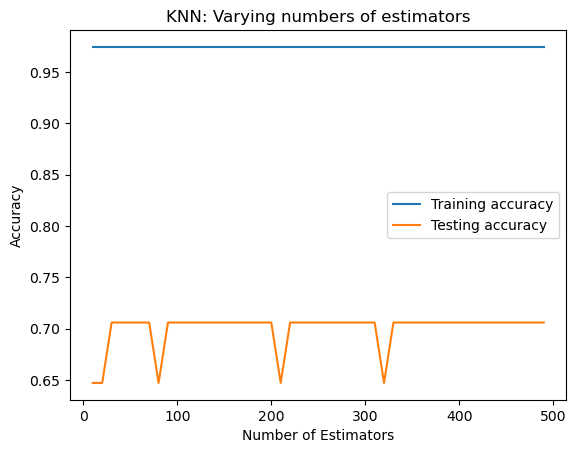

In [10]:
#visualizing hyperparameter tuning (example)
train_accuracies = {}
test_accuracies = {}
n_estimators = np.arange(10, 500, 10)

#trying different values for the model parameter n_neighbors, which is the number of neighbors used to classify a datum
for n in n_estimators:
    RF = RandomForestClassifier(max_depth = 3, n_estimators =  n, bootstrap = False)
    RF.fit(X_train, y_train)
    train_accuracies[n] = RF.score(X_train, y_train)
    test_accuracies[n] = RF.score(X_test, y_test)

#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("KNN: Varying numbers of estimators")
plt.plot(n_estimators, train_accuracies.values(), label = 'Training accuracy')
plt.plot(n_estimators, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()